In [6]:
import pandas as pd
from scipy.stats import chisquare 
import numpy as np
from scipy.stats import chi2
import scipy.stats as sts
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

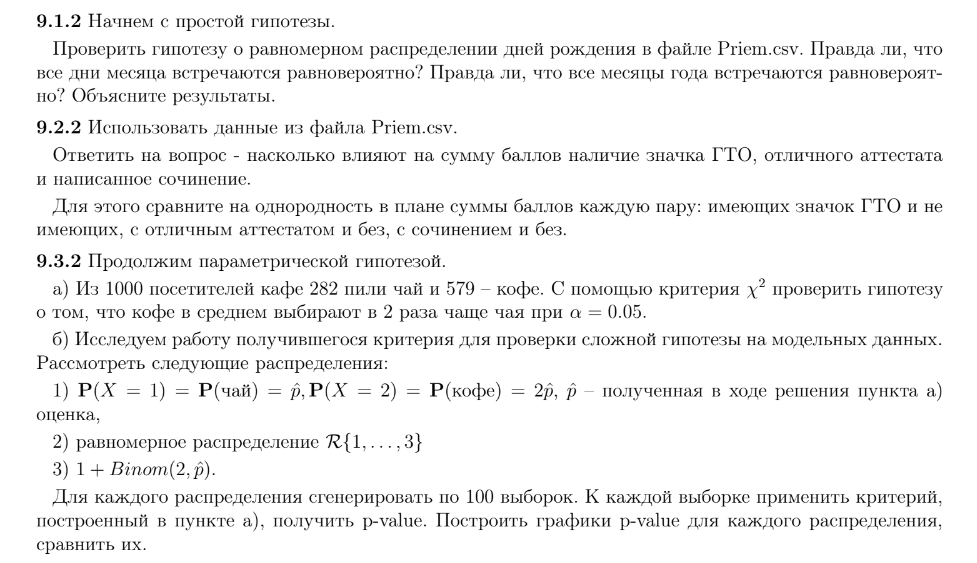

In [7]:
display(Image(filename='task_9.png', width = 800))

In [9]:
pd.read_csv('Priem_utf.csv', sep=';' ).head()

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
0,МУЖСКОЙ,388,90.0,98.0,5,0,1,Красноярский край,ГОРОД,24.09.1998,24,9
1,ЖЕНСКИЙ,351,84.0,87.0,0,0,2,Чувашская Респ,ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ,14.02.1997,14,2
2,ЖЕНСКИЙ,355,94.0,91.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,25.03.2000,25,3
3,ЖЕНСКИЙ,338,76.0,88.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,19.11.1999,19,11
4,МУЖСКОЙ,349,82.0,93.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,12.12.1999,12,12


In [10]:
df = pd.read_csv('Priem_utf.csv', sep=';' )
print(chisquare(np.unique(df['День.рождения'], return_counts=True)[1])[1])
print(chisquare(np.unique(df['Месяц.рождения'], return_counts=True)[1])[1])

0.0978722107515396
0.297958473580398


In [11]:
df_bez_GTO =  df[df['ГТО.оценка'] == 0]['Сумма.баллов']
df_GTO = df[df['ГТО.оценка'] != 0]['Сумма.баллов']
b = []
k = 10
for i in range (196,409,k):
    a = []
    a.append(len([j for j in df_GTO if i<=j<i+k]))
    a.append(len([j for j in df_bez_GTO if i<=j<i+k]))
    b.append(a)
print(sts.chi2_contingency(b)[1])

df_bez_at =  df[df['Аттестат.с.отличием.оценка'] == 0]['Сумма.баллов']
df_at = df[df['Аттестат.с.отличием.оценка'] != 0]['Сумма.баллов']
b = []
for i in range (196,409,k):
    a = []
    a.append(len([j for j in df_at if i<=j<i+k]))
    a.append(len([j for j in df_bez_at if i<=j<i+k]))
    b.append(a)
print(sts.chi2_contingency(b)[1])

df_bez_soch =  df[df['Сочинение.оценка'] == 0]['Сумма.баллов']
df_soch = df[df['Сочинение.оценка'] != 0]['Сумма.баллов']
a = []
b = []
for i in range (196,409,k):
    a.append(len([j for j in df_soch if i<=j<i+k]))
    b.append(len([j for j in df_bez_soch if i<=j<i+k]))
print(sts.chi2_contingency([a,b])[1])

0.6615431706202923
2.839469945737147e-08
2.1987772721009152e-05


In [21]:
N = 100
k2 = 282
k3 = 579 
k1 = 1000 - k2 - k3
p = (k2+k3)/(3*(k1+k2+k3))
print( chisquare( [k1,k2,k3] , [(1-3*p)*1000,p*1000,2*p*1000])[1])

0.9367573355824979


In [24]:
X1 = sts.multinomial.rvs(1000,[1-3*p, p, 2*p] ,size = 1)[0]
X2 = np.unique(sts.randint.rvs(1, 4, size = 1000), return_counts=True)[1]
X3 =np.unique(1+sts.binom.rvs(2, p, size = 1000), return_counts=True)[1]

In [25]:
print(X1,X2,X3)

[137 310 553] [319 332 349] [540 385  75]


In [50]:
pv1 = []
pv2 = []
pv3 = []
for i in range(N):
    X1 = sts.multinomial.rvs(100,[1-3*p, p, 2*p] ,size = 1)[0]
    X2 = np.unique(sts.randint.rvs(1, 4, size = 100), return_counts=True)[1]
    X3 =np.unique(1+sts.binom.rvs(2, p, size = 100), return_counts=True)[1]
    p_1 = (X1[1] + X1[2])/(3*(X1[0] + X1[1] + X1[2]))
    p_2 = (X2[1] + X2[2])/(3*(X2[0] + X2[1] + X2[2]))
    p_3 = (X3[1] + X3[2])/(3*(X3[0] + X3[1] + X3[2]))
    pv1.append( chisquare( [X1[0],X1[1],X1[2]],[(1-3*p_1)*100,p_1*100,2*p_1*100])[1])
    pv2.append( chisquare( [X2[0],X2[1],X2[2]],[(1-3*p_2)*100,p_2*100,2*p_2*100])[1])
    pv3.append( chisquare( [X3[0],X3[1],X3[2]],[(1-3*p_3)*100,p_3*100,2*p_3*100])[1])

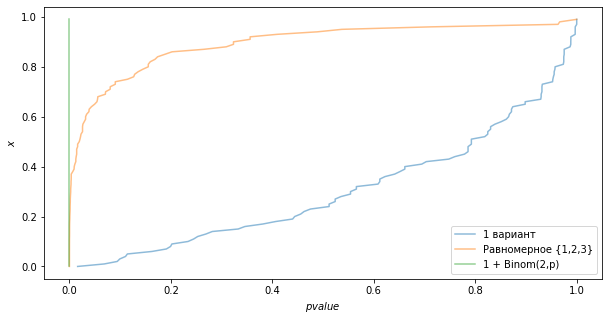

In [52]:
plt.figure( figsize= (10,5))
x1 = np.arange(0,1,1/100)
pv1.sort()
pv2.sort()
pv3.sort()
plt.plot(pv1, x1, label='1 вариант', alpha=0.5)
plt.plot(pv2, x1, label='Равномерное {1,2,3}', alpha=0.5)
plt.plot(pv3, x1,  label='1 + Binom(2,p)', alpha=0.5)
plt.ylabel('$x$')
plt.xlabel('$pvalue$')
plt.legend(loc = 'best')
plt.show()